In [3]:
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory('/home/user/Videos/emotion_live/Data/train',
    target_size=(48,48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory('/home/user/Videos/emotion_live/Data/test',
    target_size=(48,48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical'
)

Found 20093 images belonging to 6 classes.
Found 20093 images belonging to 6 classes.


In [6]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(48,48,1)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6,activation='softmax'))

In [7]:
print(train_generator.class_indices)
print(validation_generator.class_indices)

{'angry': 0, 'fear': 1, 'happy': 2, 'neutral': 3, 'sad': 4, 'surprise': 5}
{'angry': 0, 'fear': 1, 'happy': 2, 'neutral': 3, 'sad': 4, 'surprise': 5}


In [8]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# Train the model with fit_generator
emotion_model = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // 64,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 64
)

Epoch 1/50


/tmp/ipykernel_4291/4261182902.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  emotion_model = model.fit_generator(
2024-07-19 21:26:39.137672: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


313/313 [==============================] - ETA: 0s - loss: 1.7692 - accuracy: 0.2213

2024-07-19 21:29:22.409617: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


313/313 [==============================] - 182s 577ms/step - loss: 1.7692 - accuracy: 0.2213 - val_loss: 1.6944 - val_accuracy: 0.3020
Epoch 2/50
313/313 [==============================] - 168s 538ms/step - loss: 1.6190 - accuracy: 0.3444 - val_loss: 1.5308 - val_accuracy: 0.3973
Epoch 3/50
313/313 [==============================] - 119s 381ms/step - loss: 1.5206 - accuracy: 0.3958 - val_loss: 1.4747 - val_accuracy: 0.4284
Epoch 4/50
313/313 [==============================] - 119s 382ms/step - loss: 1.4574 - accuracy: 0.4273 - val_loss: 1.3807 - val_accuracy: 0.4667
Epoch 5/50
313/313 [==============================] - 119s 382ms/step - loss: 1.4020 - accuracy: 0.4542 - val_loss: 1.3229 - val_accuracy: 0.4876
Epoch 6/50
313/313 [==============================] - 119s 382ms/step - loss: 1.3517 - accuracy: 0.4730 - val_loss: 1.2723 - val_accuracy: 0.5117
Epoch 7/50
313/313 [==============================] - 120s 382ms/step - loss: 1.3172 - accuracy: 0.4861 - val_loss: 1.2314 - val_accura

In [9]:
model.save('emotion_model.h5')

In [16]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 304.4 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

  1/314 [..............................] - ETA: 47s

2024-07-22 11:17:23.565972: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


314/314 [==============================] - 22s 70ms/step
Confusion Matrix:
[[496 507 631 513 532 512]
 [482 483 618 545 460 495]
 [639 582 806 704 643 647]
 [566 504 713 593 536 529]
 [517 490 647 525 490 517]
 [477 496 659 557 506 476]]
Accuracy: 0.1664261185487483
Precision: 0.1663212656010833
Recall: 0.1664261185487483

Classification Report:
              precision    recall  f1-score   support

       angry       0.16      0.16      0.16      3191
        fear       0.16      0.16      0.16      3083
       happy       0.20      0.20      0.20      4021
     neutral       0.17      0.17      0.17      3441
         sad       0.15      0.15      0.15      3186
    surprise       0.15      0.15      0.15      3171

    accuracy                           0.17     20093
   macro avg       0.16      0.16      0.16     20093
weighted avg       0.17      0.17      0.17     20093



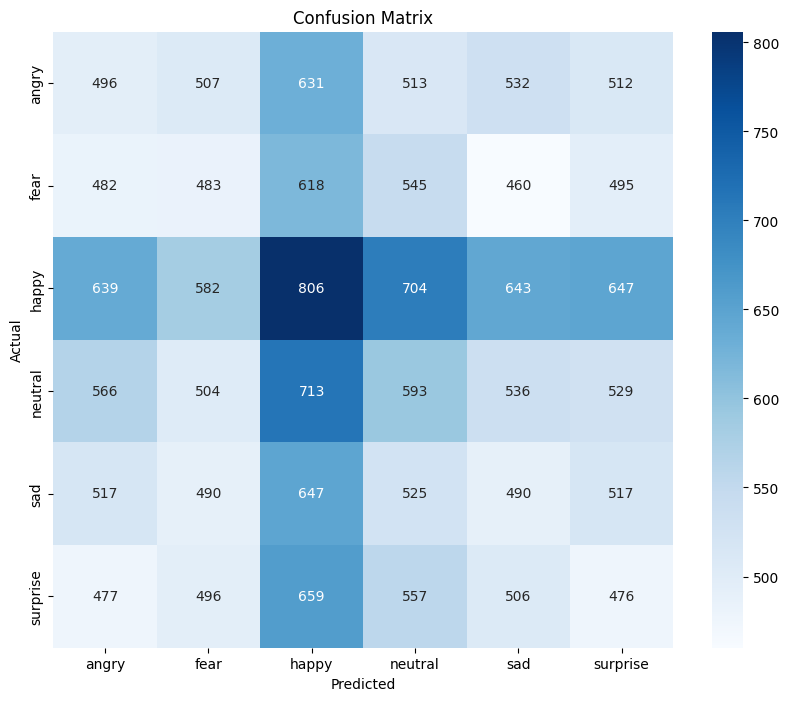

In [20]:
# Get the true labels and predicted labels
y_true = validation_generator.classes
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Compute accuracy, precision, recall
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
classification_rep = classification_report(y_true, y_pred_classes, target_names=validation_generator.class_indices.keys())

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("\nClassification Report:")
print(classification_rep)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 22, 22, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                  